# Proyek Analisis Data: [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- **Nama:** Fransco Gomex
- **Email:** franscogomex76@gmail.com
- **ID Dicoding:** fransco_go

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana persebaran jumlah total penyewaan sepeda (cnt) berdasarkan musim?
- Pertanyaan 2 : Kapan terjadi peak hours? Bagaimana persebaran penyewaan sepeda per harinya?
- Pertanyaan 3 : Apakah terdapat pengaruh weekend dan holiday terhadap perilaku penyewaan sepeda ?
- Pertanyaan 4 : Bagaimana penyebaran jumlah penyewaan sepeda terhadap kondisi cuaca(weathersit)?
- Analisis Lanjutan : Apakah ada pengaruh panas (temperature) terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [2]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap

## Data Wrangling

### Gathering Data

In [3]:
# Read Data
## Check the data path
df_day = pd.read_csv('./data/day.csv')
df_hour = pd.read_csv('./data/hour.csv')

In [4]:
# Show sample day.csv
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
# Show sample hour.csv
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day.csv are bike sharing data agrareted on daily basis
- hour.csv are bike sharing data agrarated on hour basis
- *dataset characteristics info*

	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assessing Data

In [6]:
# Get info for NaN and Type Feature in df_day
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# Get info for NaN and Type Feature in df_day
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


*   each feature in df_day and df_hour are non-null
*   season, yr, mnth, weekday represented by integer -> categorized data
*   holiday and weekday are represented by integer -> bollean
*   there're a invalid type in column `dteday`
*   The temp, atemp, hum, and windspeed columns have been normalized, but we can unnormalize them if we need to represent the actual values (optional)


---




In [8]:
# Get Descriptive Statisctic df_day
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [9]:
# Get Descriptive Statisctic df_hour
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [10]:
# Check Duplicated data for df_day
df_day.duplicated().sum()

0

In [11]:
# Check Duplicated data for df_hour
df_hour.duplicated().sum()

0


*   no duplicated data for df_day and df_hour



---



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


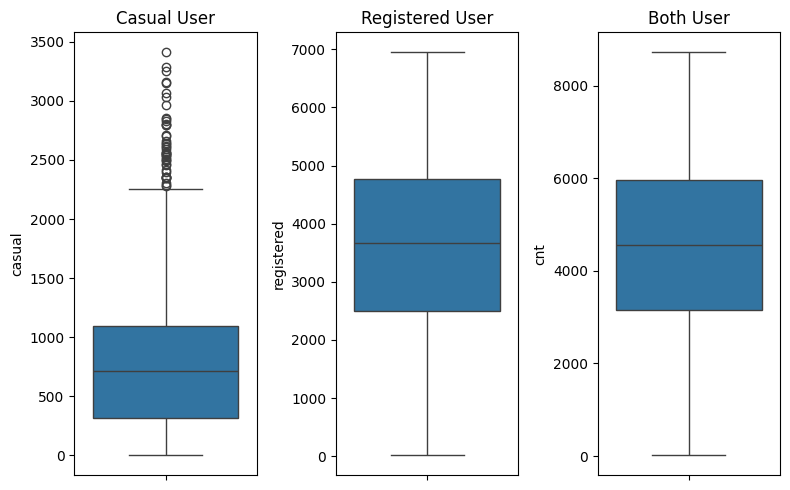

In [12]:
# Check Outliner for Casual, Registered, and Both user using BoxPlot

# Set the size of the plot
plt.figure(figsize=(8, 5))

# Create a boxplot for the 'casual' column
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.boxplot(data=df_day['casual'])
plt.title('Casual User')

# Create a boxplot for the 'registered' column
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(data=df_day['registered'])
plt.title('Registered User')

# Create a boxplot for the 'cnt' column
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.boxplot(data=df_day['cnt'])
plt.title('Both User')

# Adjust layout
plt.tight_layout()
plt.show()



*   we can see there is an outliner in Casual User


---





**Insight:**
*   each feature in df_day and df_hour are non-null
*   cleared of data duplicated
*   season, yr, mnth, hr, weekday, weathersit represented by integer -> categorized data
*   holiday and weekday are represented by integer -> bollean
*   there're a invalid type in column `dteday`
*   outliner in Casual User in dataframe df_day
*   The temp, atemp, hum, and windspeed columns have been normalized, but we can unnormalize them if we need to represent the actual values (optional)

### Cleaning Data

In [13]:
# Change the dteday format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [14]:
# Convert holiday and workingday columns to boolean df_day
df_day['holiday'] = df_day['holiday'].astype(bool)
df_day['workingday'] = df_day['workingday'].astype(bool)

# Convert holiday and workingday columns to boolean df_hour
df_hour['holiday'] = df_hour['holiday'].astype(bool)
df_hour['workingday'] = df_hour['workingday'].astype(bool)

In [15]:
# Mapping dictionaries
def map_columns(df):
    # Mapping dictionaries
    season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
    yr_map = {0: '2011', 1: '2012'}
    mnth_map = {
        1: 'January', 2: 'February', 3: 'March', 4: 'April',
        5: 'May', 6: 'June', 7: 'July', 8: 'August',
        9: 'September', 10: 'October', 11: 'November', 12: 'December'
    }
    weekday_map = {
        0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
        4: 'Friday', 5: 'Saturday', 6: 'Sunday'
    }
    weather_map = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
    }

    # Applying the mapping
    df['season'] = df['season'].replace(season_map)
    df['yr'] = df['yr'].replace(yr_map)
    df['mnth'] = df['mnth'].replace(mnth_map)
    df['weekday'] = df['weekday'].replace(weekday_map)
    df['weathersit'] = df['weathersit'].replace(weather_map)

    return df

# Applying the mapping
df_day = map_columns(df_day)
df_hour = map_columns(df_hour)

In [16]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    object        
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    bool          
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    bool          
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: bool(2), datetime64[ns]

In [17]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  object        
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
*   datetime are handled
*   season, yr, mnth, hr, weekday,weathersit been changed to category format
*   holiday and weekday are changed to bollean
*   outliner in Casual User in dataframe df_day
      * not handle because it's can damage the information
      * the Casual User not used for EDA


## Exploratory Data Analysis (EDA)

Guide :
- Pertanyaan 1 : Bagaimana persebaran jumlah total penyewaan sepeda (cnt) berdasarkan musim?
- Pertanyaan 2 : Kapan terjadi peak hours? Bagaimana persebaran penyewaan sepeda per harinya?
- Pertanyaan 3 : Apakah terdapat pengaruh weekend dan holiday terhadap perilaku penyewaan sepeda ?
- Pertanyaan 4 : Bagaimana penyebaran jumlah penyewaan sepeda terhadap kondisi cuaca(weathersit)?

### Explore Season towards Total Count of Rent Bicycles (cnt)

In [18]:
# Group number of rental (cnt) by season
df_season = df_day.groupby('season').agg({
    'cnt': ['sum','median','mean','std']
})

df_season

cnt                                  
            sum  median         mean          std
season                                           
Fall    1061129  5353.5  5644.303191  1459.800381
Spring   471348  2209.0  2604.132597  1399.942119
Summer   918589  4941.5  4992.331522  1695.977235
Winter   841613  4634.5  4728.162921  1699.615261

result 1 :
- prefer to rent bikes in Fall, followed by Summer, Winter, and Spring

### Explore the Distribution of Bicycle Rentals by Hour




In [19]:
# Group number of rental (cnt) by hour
df_hour_cnt = df_hour.groupby('hr').agg({
    'cnt': ['min','max','median','mean','std']
})

df_hour_cnt

cnt                                    
   min  max median        mean         std
hr                                        
0    2  283   40.0   53.898072   42.307910
1    1  168   20.0   33.375691   33.538727
2    1  132   11.0   22.869930   26.578642
3    1   79    6.0   11.727403   13.239190
4    1   28    6.0    6.352941    4.143818
5    1   66   19.0   19.889819   13.200765
6    1  213   76.0   76.044138   55.084348
7    1  596  208.0  212.064649  161.441936
8    5  839  385.0  359.011004  235.189285
9   14  426  216.0  219.309491   93.703458
10   8  539  147.0  173.668501  102.205413
11  10  663  180.0  208.143054  127.495536
12   3  776  229.0  253.315934  145.081134
13  11  760  224.0  253.661180  148.107657
14  12  750  212.0  240.949246  147.271574
15   7  750  227.0  251.233196  144.632541
16  11  783  304.5  311.983562  148.682618
17  15  976  475.0  461.452055  232.656611
18  23  977  418.5  425.510989  224.639304
19  11  743  309.5  311.523352  161.050359
20  11  567  223.5  226.030220  119.670164
21   6  584  173.5  172.314560   89.788893
22   9  502  129.0  131.335165   69.937782
23   2  256   80.0   87.831044   50.846889

result 2 :
- there is an increase in bike usage at 8 AM. Then, at 4 PM to 7 PM, with the peak usage occurring between 5 and 6 PM, where the average reaches more than 400 users.

### Explore the holiday impact to number of rental




*   Check if there are holiday such as working

In [20]:
# working day : 1True, 0 False
# holiday : 1True, 0False
# logic if holiday(1) -> Working Day(0)

check = df_day[(df_day['holiday'] == True) & (df_day['workingday'] == True)]
check[['holiday','workingday']]

,holiday,workingday



*   so there are no such holiday that are working
*   weekend are just 2 days + holiday ,the other side weekdays are 5 days - holiday -> either using mean/median than sum (because the porpotion not balanced)

In [35]:
# Categorized by workingday
df_holiday = df_day.groupby(['workingday']).agg({
    'cnt': ['median','mean','std']
})
df_holiday

cnt                          
            median         mean          std
workingday                                  
False       4459.0  4330.168831  2052.141245
True        4582.0  4584.820000  1878.415583

result 3:
*   either holiday or working day are balanced
*   weekend and holiday does'nt have a critical impact in rental proporsion




### Explore weathersit towords Total Number of Rental Bicycles

In [22]:
# Categorized by weathersit
df_weathersit = df_hour.groupby(['weathersit']).agg({
    'cnt': ['sum','median','mean','std']
})
df_weathersit.sort_values(by=('cnt','sum'), ascending=False)

cnt         \
                                                        sum median   
weathersit                                                           
Clear, Few clouds, Partly cloudy                    2338173  159.0   
Mist + Cloudy, Mist + Broken clouds, Mist + Few...   795952  133.0   
Light Snow, Light Rain + Thunderstorm + Scatter...   158331   63.0   
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...      223   36.0   

                                                                            
                                                          mean         std  
weathersit                                                                  
Clear, Few clouds, Partly cloudy                    204.869272  189.487773  
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  175.165493  165.431589  
Light Snow, Light Rain + Thunderstorm + Scatter...  111.579281  133.781045  
Heavy Rain + Ice Pallets + Thunderstorm + Mist,...   74.333333   77.925178

result 4 :

*   Bicycle rental behavior tends to prefer renting bikes on sunny and cloudy days compared to rainy weather


**Insight:**
- prefer to rent bikes in Fall, followed by Summer, Winter, and Spring
-  there is an increase in bike usage at 8 AM. Then, at 4 PM to 7 PM, with the peak usage occurring between 5 and 6 PM, where the average reaches more than 400 users.
- weekend and holiday does'nt have a critical impact in rental proporsion
- bicycle rental behavior tends to prefer renting bikes on sunny and cloudy days compared to rainy weather


## Visualization & Explanatory Analysis

Guide :
- Pertanyaan 1 : Bagaimana persebaran jumlah total penyewaan sepeda (cnt) berdasarkan musim?
- Pertanyaan 2 : Kapan terjadi peak hours? Bagaimana persebaran penyewaan sepeda per harinya?
- Pertanyaan 3 : Apakah terdapat pengaruh weekend dan holiday terhadap perilaku penyewaan sepeda ?
- Pertanyaan 4 : Bagaimana penyebaran jumlah penyewaan sepeda terhadap kondisi cuaca(weathersit)?

### Pertanyaan 1: Bagaimana persebaran jumlah total penyewaan sepeda (cnt) berdasarkan musim?

In [23]:
# Flattening the MultiIndex columns
df_season.columns = ['cnt_sum', 'cnt_median', 'cnt_mean', 'cnt_std']

<ipython-input-31-63d9dfc98a5e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_season_sorted, x='season', y='cnt_sum', palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

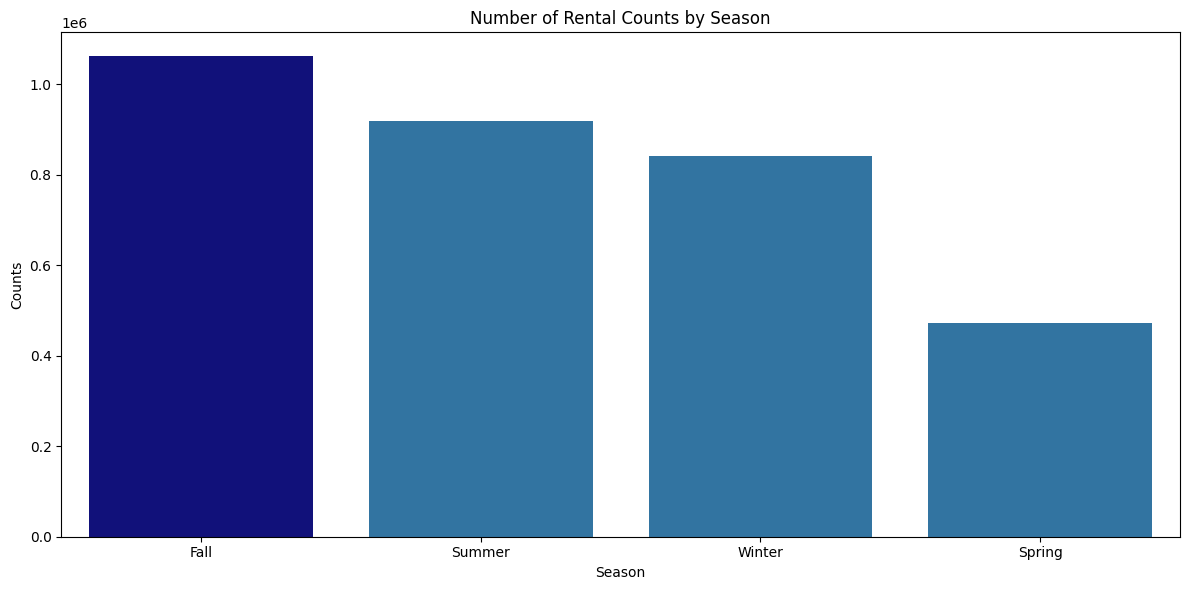

In [31]:
# Sort the DataFrame by cnt_sum
df_season_sorted = df_season.sort_values(by='cnt_sum',ascending=False)

# Identify the maximum value
max_value = df_season_sorted['cnt_sum'].max()

# Create a color list based on cnt_sum
colors = ['darkblue' if value == max_value else '#1f77b4' for value in df_season_sorted['cnt_sum']]

# Create a bar plot for cnt_sum
plt.figure(figsize=(12, 6))
sns.barplot(data=df_season_sorted, x='season', y='cnt_sum', palette=colors)

# Add titles and labels
plt.title('Number of Rental Counts by Season')
plt.xlabel('Season')
plt.ylabel('Counts')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 2:  Kapan terjadi peak hours? Bagaimana persebaran penyewaan sepeda per harinya?

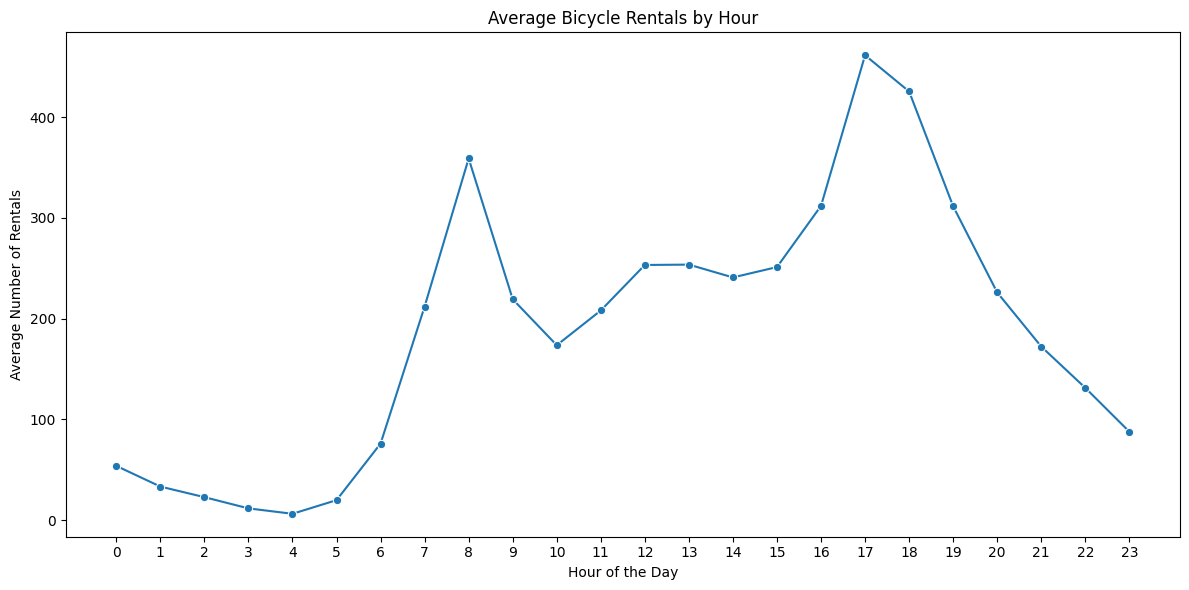

In [32]:
# Reset the index to flatten the DataFrame
df_hour_cnt.columns = ['cnt_min', 'cnt_max', 'cnt_median', 'cnt_mean', 'cnt_std']

# Create a line plot for cnt_mean
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_hour_cnt, x='hr', y='cnt_mean', marker='o')

# Add titles and labels
plt.title('Average Bicycle Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Rentals')
plt.xticks(range(0, 24))  # Show all hours on x-axis

# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Apakah terdapat pengaruh weekend dan holiday terhadap perilaku penyewaan sepeda ?

In [36]:
df_holiday.reset_index(inplace=True)  # Resetting index to keep 'workingday' as a column
df_holiday.columns = ['workingday','cnt-mean','cnt-median','cnt-std']  # Rename column name

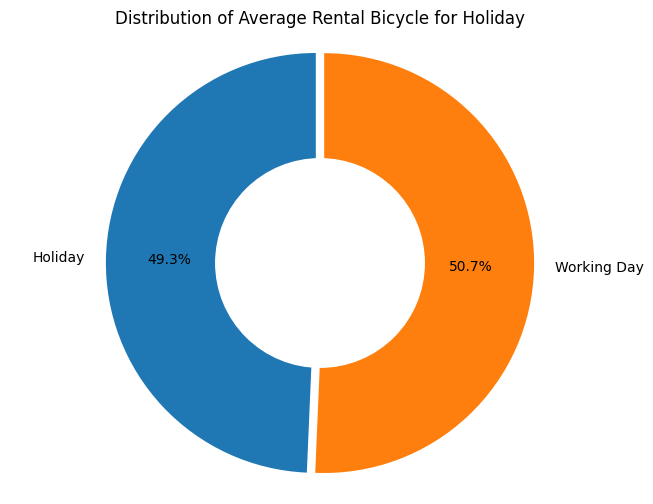

In [37]:
mean_values = df_holiday['cnt-mean']
labels = df_holiday['workingday'].map({False: 'Holiday', True: 'Working Day'})

# explosion
explode = (0.02, 0.02)

# Create Plot
plt.figure(figsize=(8, 6))
plt.pie(mean_values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7,explode=explode)

# Crate Circle for the donat plot
centre_circle = plt.Circle((0, 0), 0.5, fc='white')  # Circle Radius
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribution of Average Rental Bicycle for Holiday')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Pertanyaan 4 : Bagaimana penyebaran jumlah penyewaan sepeda terhadap kondisi cuaca(weathersit)?

<ipython-input-38-39adb8fd7ea1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=wrapped_labels, x=sum_values, palette=colors, orient='h')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping

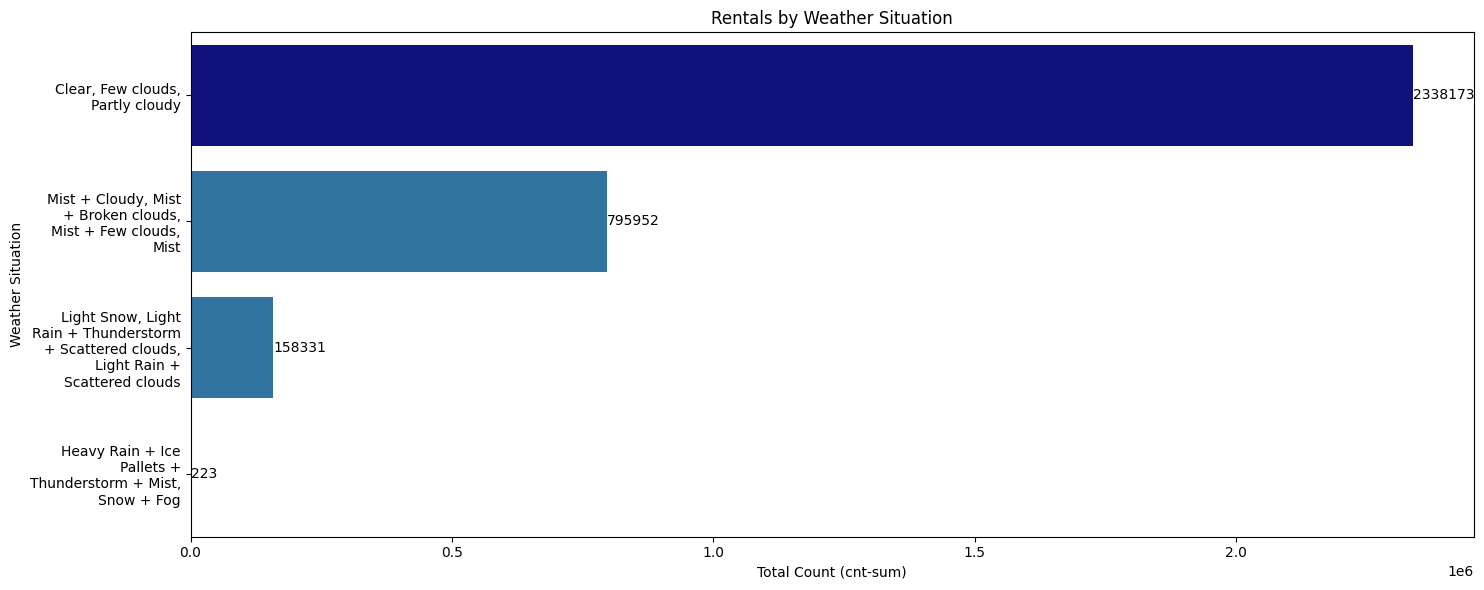

In [38]:
# Sort by cnt sum
df_weathersit.sort_values(by=('cnt', 'sum'), ascending=False, inplace=True)

sum_values = df_weathersit[('cnt', 'sum')]
labels = df_weathersit.index  # Index will be the weather situation

# Shorten the labels by wrapping the text
wrapped_labels = [textwrap.fill(label, 20) for label in labels]

# Create a figure size
plt.figure(figsize=(15, 6))

# Create a bar plot with Seaborn
colors = ['#1f77b4' if value < sum_values.max() else 'darkblue' for value in sum_values]
ax = sns.barplot(y=wrapped_labels, x=sum_values, palette=colors, orient='h')

# Add the count value to each bar
for index, value in enumerate(sum_values):
    ax.text(value, index, f'{int(value)}', va='center')

plt.title('Rentals by Weather Situation')
plt.xlabel('Total Count (cnt-sum)')
plt.ylabel('Weather Situation')
plt.tight_layout()  # Adjust layout
plt.show()

**Insight:**
- Sebagian besar orang lebih memilih menyewa sepeda pada musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring).
- Rata-rata terjadi peningkatan penggunaan sepeda pada pukul 8 pagi. Kemudian pada jam 4 sore hingga 7 malam, dengan puncak penggunaan terjadi pada jam 5 hingga 6 sore, di mana rerata mencapai lebih dari 400 orang.
- Tidak ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari libur dan hari kerja.
- Diketahui bahwa cuaca memengaruhi jumlah penyewaan sepeda, dengan cuaca cerah & berawan menjadi yang paling banyak, diikuti cuaca berkabut, hujan ringan & salju ringan, serta hujan deras & salju.

## Analisis Lanjutan (Opsional) : Clustering Analysis

- Analisis Lanjutan : Apakah ada pengaruh panas (temperature) terhadap jumlah penyewaan sepeda?

In [39]:
# Cek korelasi antara temp, atemp, hum, windspeed, dengan cnt

df_weather = df_hour[['temp','atemp','hum','windspeed','cnt']]
correlation_weather = df_weather.corr()
correlation_weather

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


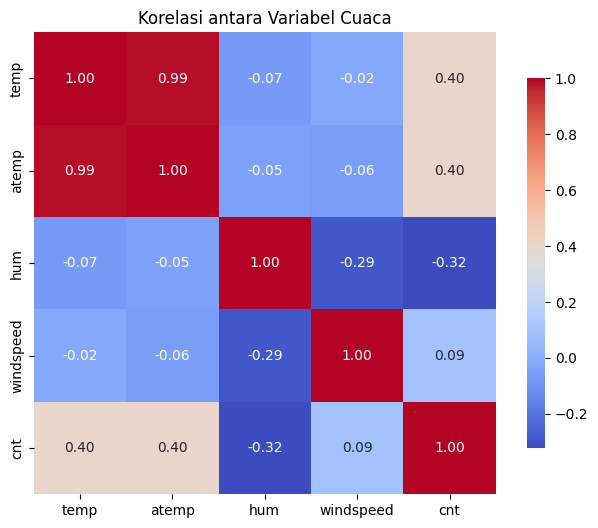

In [40]:
# Set ukuran gambar
plt.figure(figsize=(8, 6))

# Buat heatmap
sns.heatmap(correlation_weather, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

# Tambahkan judul
plt.title('Korelasi antara Variabel Cuaca')

# Tampilkan plot
plt.show()

- terdapat korelasi antara temp, atemp (predicted temperature) dengan jumlah rental sepeda (cnt)


In [41]:
df_temp = df_hour[['temp','cnt']]
df_temp['temp'] = df_temp['temp'] * 41

df_temp.describe(include='all')

<ipython-input-41-46233edc22e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['temp'] = df_temp['temp'] * 41


,temp,cnt
count,17379.000000,17379.000000
mean,20.376474,189.463088
std,7.894801,181.387599
min,0.820000,1.000000
25%,13.940000,40.000000
50%,20.500000,142.000000
75%,27.060000,281.000000
max,41.000000,977.000000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


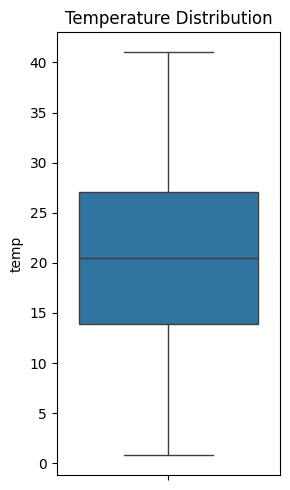

In [42]:
# Check Outliner for Casual, Registered, and Both user using BoxPlot

# Set the size of the plot
plt.figure(figsize=(3, 5))

# Create a boxplot for the 'temp' column
sns.boxplot(data=df_temp['temp'])
plt.title('Temperature Distribution')

# Adjust layout
plt.tight_layout()
plt.show()



*   Distribution temperature between 0 - 41 Celcius
*   With average temperature at 20.5 Celcius

In [43]:
# Create Categorize for df_temp
def categorize_temperature(temp):
    if temp < 16:
        return 'low'
    elif 16 <= temp <= 30:
        return 'medium'
    else:
        return 'high'

df_temp['temp_category'] = df_temp['temp'].apply(categorize_temperature)

<ipython-input-43-1afcd6fd4e81>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['temp_category'] = df_temp['temp'].apply(categorize_temperature)


In [44]:
# Ordered the category
category_order = ['low', 'medium', 'high']
df_temp['temp_category'] = pd.Categorical(df_temp['temp_category'], categories=category_order, ordered=True)

df_temp_data = df_temp.groupby('temp_category').agg({
    'cnt': ['sum', 'median', 'mean', 'std']
})

df_temp_data

<ipython-input-44-7e58be610f2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['temp_category'] = pd.Categorical(df_temp['temp_category'], categories=category_order, ordered=True)
<ipython-input-44-7e58be610f2c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_temp_data = df_temp.groupby('temp_category').agg({


cnt                               
                   sum median        mean         std
temp_category                                        
low             626084   71.0  107.704111  118.368324
medium         1972191  168.0  208.675378  188.323001
high            694404  292.0  328.323404  184.616966

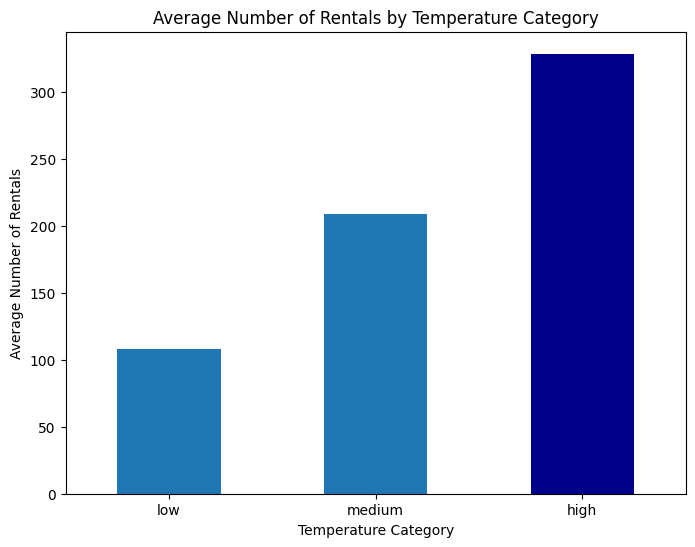

In [45]:
# Get the mean value
mean_values = df_temp_data['cnt']['mean']

# Identify the maximum value
max_value = mean_values.max()

# Create a color list based on mean_values
colors = ['darkblue' if value == max_value else '#1f77b4' for value in mean_values]

# Create bar plot
plt.figure(figsize=(8, 6))
mean_values.plot(kind='bar', color=colors)  # Pass colors here

# Add title and axis label
plt.xlabel('Temperature Category')
plt.ylabel('Average Number of Rentals')
plt.title('Average Number of Rentals by Temperature Category')

# Show the plot
plt.xticks(rotation=0)
plt.show()

*   Rerata sebagian besar orang lebih memilih untuk menyewa sepeda pada saat high temperature [panas] (>30 Celcius) disusul dengan medium temperature (16-30 Celcius) dan low temperature (<16 Celcius)


## Conclusion

- Conculusion Pertanyaan 1 : Sebagian besar orang lebih memilih menyewa sepeda pada musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan musim semi (Spring).
- Conclusion Pertanyaan 2 : Rata-rata terjadi peningkatan penggunaan sepeda pada pukul 8 pagi. Kemudian pada jam 4 sore hingga 7 malam, dengan puncak penggunaan terjadi pada jam 5 hingga 6 sore, di mana rerata mencapai lebih dari 400 orang.
- Conclusion Pertanyaan 3: Tidak ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari libur dan hari kerja.
- Conclusion Pertanyaan 4 : Diketahui bahwa cuaca memengaruhi jumlah penyewaan sepeda, dengan cuaca cerah & berawan menjadi yang paling banyak, diikuti cuaca berkabut, hujan ringan & salju ringan, serta hujan deras & salju.
- Conclusion Analisis Lanjutan : Rerata sebagian besar orang lebih memilih untuk menyewa sepeda pada saat high temperature [panas] (>30 Celcius) disusul dengan medium temperature (16-30 Celcius) dan low temperature (<16 Celcius)